In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images, test_images = train_images / 255.0, test_images / 255.0

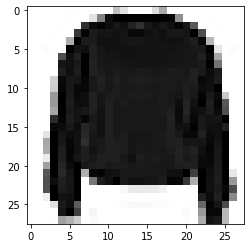

In [23]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

## Defining Model

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # flatten the data from (28,28) => (784)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4982 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3769 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3381 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3145 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2962 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2812 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2588 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2508 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [25]:
[np.argmax(arr) for arr in model.predict(test_images[:5])], test_labels[:5]

1/1 [==============================] - 0s 37ms/step


([9, 2, 1, 1, 6], array([9, 2, 1, 1, 6], dtype=uint8))

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

test_loss, test_acc

313/313 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8792


(0.33673277497291565, 0.8791999816894531)

313/313 [==============================] - 0s 917us/step


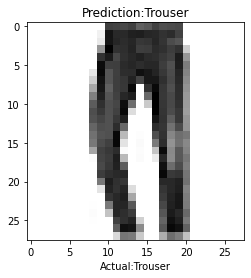

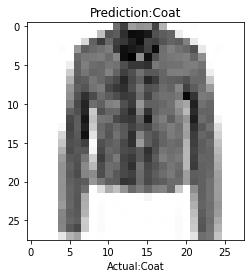

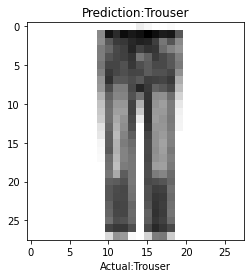

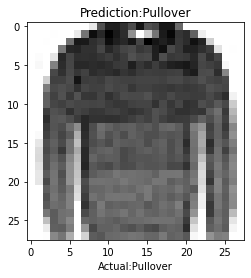

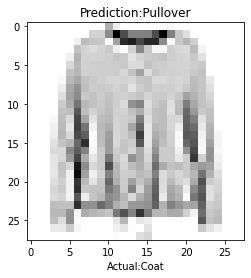

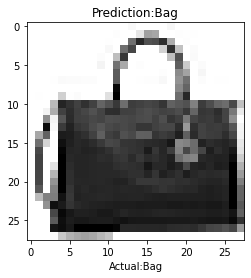

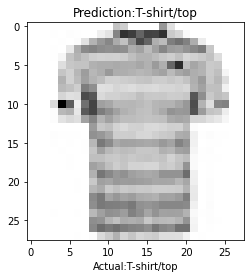

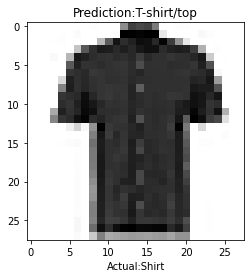

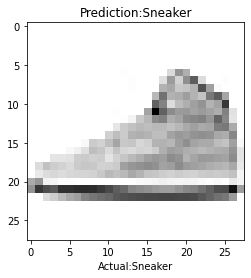

In [35]:
prediction = model.predict(test_images)

for i in range(5,50,5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel('Actual:' + class_names[test_labels[i]])
    plt.title('Prediction:' + class_names[np.argmax(prediction[i])])
    plt.show()